# Add MERFISH mosaic images to spatialdata object

In [1]:
import spatialdata
import spatialdata_io
import spatialdata_plot
import pandas as pd
import gzip
import dask.dataframe as dd
from scipy.spatial import KDTree
import numpy as np
from spatialdata.models import PointsModel
import os

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [2]:
data_dir = os.path.abspath("../home/data")
#data_dir = os.path.abspath('../data')
!ls -l $data_dir

lrwxrwxrwx 1 ra98gaq pn52ra 35 Feb  4 15:06 /home/data -> /dss/dssfs03/pn52re/pn52re-dss-0001


In [3]:
archive_dir = os.path.abspath("../home/archive")
!ls -l $archive_dir

lrwxrwxrwx 1 ra98gaq pn52ra 35 Feb  4 17:22 /home/archive -> /dss/dssfs03/pn52re/pn52re-dss-0000


In [4]:
#sdata_file = os.path.join(data_dir, 'processed_data/FOXF2/SLIDE2/REGION1/sdata.zarr')
#slide_name = 'slide2'
#region_name = 'region1'

In [5]:
cohort_name = "foxf2"
slide_name = "s2"
region_name= "r1"
sample_name = f"{cohort_name}_{slide_name}_{region_name}"
sdata_file = os.path.join(data_dir, "cellseg-benchmark", "sdata-objects", sample_name, "sdata.zarr")

In [6]:
output_name = os.path.join("20240322_mousebrain-Slide02-cp-WT-PCKO", "region_1")
merfish_output = os.path.join(archive_dir, "202402-Foxf2-KO", "merfish_output", output_name)

## Add images to spatialdata object

In [7]:
sdata = spatialdata.read_zarr(sdata_file)

In [8]:
sdata

SpatialData object, with associated Zarr store: /dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark/sdata-objects/foxf2_s2_r1/sdata.zarr
├── Points
│     ├── 'foxf2_s2_r1_all_transcript_factors': DataFrame with shape: (<Delayed>, 13) (2D points)
│     ├── 'foxf2_s2_r1_nF5_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF10_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF20_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF21_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF25_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF28_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF30_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF50_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│

### Mosaic images from merscope

In [9]:
def add_mosaic_images(sdata, path, z_layers=3):
    sdata_new = spatialdata_io.merscope(path, z_layers=z_layers, cells_boundaries=True, mosaic_images=True, slide_name=f"{cohort_name}_{slide_name}", region_name=region_name)
    if isinstance(z_layers, int):
        z_layers=[z_layers]
    # add images to sdata
    for z in z_layers:
        sdata.images[f'{sample_name}_z{z}'] = sdata_new[f'{sample_name}_z{z}']
    return sdata

In [10]:
sdata = add_mosaic_images(sdata, merfish_output, z_layers=3)

INFO     The column "global_x" has now been renamed to "x"; the column "x" was already present in the dataframe,   
         and will be dropped.                                                                                      
INFO     The column "global_y" has now been renamed to "y"; the column "y" was already present in the dataframe,   
         and will be dropped.                                                                                      


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/functools.py:946: UserWarning: The index of the dataframe is not monotonic increasing. It is recommended to sort the data to adjust the order of the index before calling .parse() (or call `parse(sort=True)`) to avoid possible problems due to unknown divisions.
  return method.__get__(obj, cls)(*args, **kwargs)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [11]:
sdata

SpatialData object, with associated Zarr store: /dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark/sdata-objects/foxf2_s2_r1/sdata.zarr
├── Images
│     └── 'foxf2_s2_r1_z3': DataTree[cyx] (7, 54456, 65675), (7, 27228, 32837), (7, 13614, 16418), (7, 6807, 8209), (7, 3403, 4104)
├── Points
│     ├── 'foxf2_s2_r1_all_transcript_factors': DataFrame with shape: (<Delayed>, 13) (2D points)
│     ├── 'foxf2_s2_r1_nF5_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF10_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF20_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF21_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF25_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF28_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF30_pixel_factors': Da

In [12]:
sdata[f'{sample_name}_z3']

<xarray.DataTree>
Group: /
├── Group: /scale0
│       Dimensions:  (c: 7, y: 54456, x: 65675)
│       Coordinates:
│         * c        (c) <U5 140B 'PolyT' 'Aldoc' 'Plp1' 'App' 'Sst' 'Fth1' 'DAPI'
│         * y        (y) float64 436kB 0.5 1.5 2.5 3.5 ... 5.445e+04 5.445e+04 5.446e+04
│         * x        (x) float64 525kB 0.5 1.5 2.5 3.5 ... 6.567e+04 6.567e+04 6.567e+04
│       Data variables:
│           image    (c, y, x) uint16 50GB dask.array<chunksize=(1, 4096, 4096), meta=np.ndarray>
├── Group: /scale1
│       Dimensions:  (c: 7, y: 27228, x: 32837)
│       Coordinates:
│         * c        (c) <U5 140B 'PolyT' 'Aldoc' 'Plp1' 'App' 'Sst' 'Fth1' 'DAPI'
│         * y        (y) float64 218kB 1.0 3.0 5.0 7.0 ... 5.445e+04 5.445e+04 5.446e+04
│         * x        (x) float64 263kB 1.0 3.0 5.0 7.0 ... 6.567e+04 6.567e+04 6.567e+04
│       Data variables:
│           image    (c, y, x) uint16 13GB dask.array<chunksize=(1, 4096, 4096), meta=np.ndarray>
├── Group: /scale2
│       Dimensions:  (c: 7, y: 13614, x: 16418)
│       Coordinates:
│         * c        (c) <U5 140B 'PolyT' 'Aldoc' 'Plp1' 'App' 'Sst' 'Fth1' 'DAPI'
│         * y        (y) float64 109kB 2.0 6.0 10.0 ... 5.445e+04 5.445e+04 5.445e+04
│         * x        (x) float64 131kB 2.0 6.0 10.0 ... 6.566e+04 6.567e+04 6.567e+04
│       Data variables:
│           image    (c, y, x) uint16 3GB dask.array<chunksize=(1, 4096, 4096), meta=np.ndarray>
├── Group: /scale3
│       Dimensions:  (c: 7, y: 6807, x: 8209)
│       Coordinates:
│         * c        (c) <U5 140B 'PolyT' 'Aldoc' 'Plp1' 'App' 'Sst' 'Fth1' 'DAPI'
│         * y        (y) float64 54kB 4.0 12.0 20.0 ... 5.444e+04 5.444e+04 5.445e+04
│         * x        (x) float64 66kB 4.0 12.0 20.0 ... 6.565e+04 6.566e+04 6.567e+04
│       Data variables:
│           image    (c, y, x) uint16 782MB dask.array<chunksize=(1, 4096, 4096), meta=np.ndarray>
└── Group: /scale4
        Dimensions:  (c: 7, y: 3403, x: 4104)
        Coordinates:
          * c        (c) <U5 140B 'PolyT' 'Aldoc' 'Plp1' 'App' 'Sst' 'Fth1' 'DAPI'
          * y        (y) float64 27kB 8.001 24.0 40.01 ... 5.442e+04 5.443e+04 5.445e+04
          * x        (x) float64 33kB 8.001 24.0 40.01 ... 6.563e+04 6.565e+04 6.567e+04
        Data variables:
            image    (c, y, x) uint16 196MB dask.array<chunksize=(1, 3403, 4096), meta=np.ndarray>

In [13]:
channels = spatialdata.models.get_channel_names(sdata[f'{sample_name}_z3'])
channels = [str(ch) for ch in channels]
channels

['PolyT', 'Aldoc', 'Plp1', 'App', 'Sst', 'Fth1', 'DAPI']

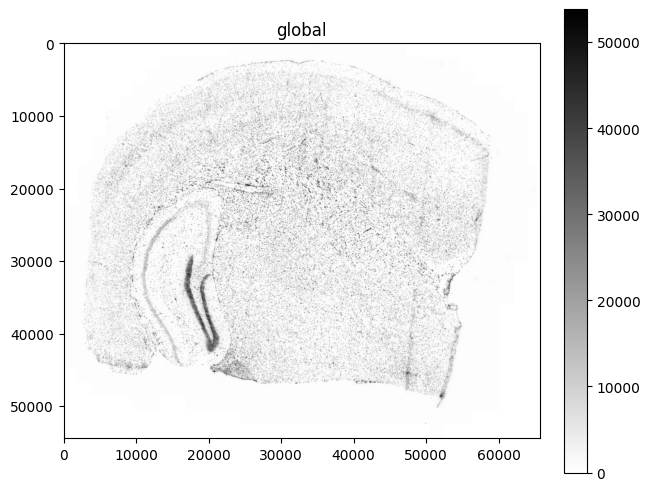

In [14]:
sdata.pl.render_images(f'{sample_name}_z3', channel=channels[6], scale='scale4', cmap="binary").pl.show()

### Ficture summary images 
need to figure out coordinate transfor for this!

## Plot

TODO: also plot images once they are downloaded - check again if shapes are visualised correctly

NOTE inconsistencies regarding plotting method - offset with `method="datashader"`` for render_shapes. Should report this as issue, but need to reproduce with their datsets first. For now, use method "matplotlib" instead

In [15]:
import spatialdata_plot
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap

In [16]:
factor = "nF25"

In [17]:
#sdata = spatialdata.read_zarr(sdata_file)

In [18]:
sdata

SpatialData object, with associated Zarr store: /dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark/sdata-objects/foxf2_s2_r1/sdata.zarr
├── Images
│     └── 'foxf2_s2_r1_z3': DataTree[cyx] (7, 54456, 65675), (7, 27228, 32837), (7, 13614, 16418), (7, 6807, 8209), (7, 3403, 4104)
├── Points
│     ├── 'foxf2_s2_r1_all_transcript_factors': DataFrame with shape: (<Delayed>, 13) (2D points)
│     ├── 'foxf2_s2_r1_nF5_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF10_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF20_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF21_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF25_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF28_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF30_pixel_factors': Da

In [19]:
sdata[f'{sample_name}_all_transcript_factors']

,x,y,global_z,gene,transcript_id,nF50_factors,nF28_factors,nF10_factors,nF30_factors,nF5_factors,nF25_factors,nF21_factors,nF20_factors
npartitions=96,,,,,,,,,,,,,
,float64,float64,float64,category[unknown],string,int64,int64,int64,int64,int64,int64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [20]:
sdata[f'{sample_name}_transcripts']

,x,y,gene,global_z,transcript_id,fov,barcode_id,cell_id,Unnamed: 0
npartitions=96,,,,,,,,,
,float64,float64,category[unknown],float64,string,int64,int64,int64,int64
,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...


In [21]:
sdata[f'{sample_name}_polygons']

,ID,EntityID,ZIndex,geometry,Type,ZLevel,Name,ParentID,ParentType
EntityID,,,,,,,,,
1865558700002100001,1240,1865558700002100001,0,"MULTIPOLYGON (((1683.208 144.984, 1683.891 142...",cell,1.5,None,None,None
1865558700002100002,1241,1865558700002100002,0,"MULTIPOLYGON (((1724.923 140.017, 1728.079 140...",cell,1.5,None,None,None
1865558700002100003,1242,1865558700002100003,0,"MULTIPOLYGON (((1630.973 138.314, 1631.272 139...",cell,1.5,None,None,None
1865558700002100004,1243,1865558700002100004,0,"MULTIPOLYGON (((1642.95 138.539, 1643.987 139....",cell,1.5,None,None,None
1865558700002100005,1244,1865558700002100005,0,"MULTIPOLYGON (((1656.457 138.593, 1658.164 140...",cell,1.5,None,None,None
...,...,...,...,...,...,...,...,...,...
1865558700166100188,749035,1865558700166100188,0,"MULTIPOLYGON (((6473.996 5416.324, 6473.852 54...",cell,1.5,None,None,None
1865558700166100189,749036,1865558700166100189,0,"MULTIPOLYGON (((6599.664 5420.512, 6600.616 54...",cell,1.5,None,None,None
1865558700166100190,749037,1865558700166100190,0,"MULTIPOLYGON (((6500.011 5420.176, 6500.683 54...",cell,1.5,None,None,None


In [22]:
# prepare factor labels for plotting
# convert factor labels to categories
#sdata[f'{sample_name}_all_transcript_factors'] = sdata[f'{sample_name}_all_transcript_factors'].categorize(columns=f'{factor}_factors')
# get colormap for each factor
ficture_dex_file = os.path.join(data_dir, 'cellseg-benchmark', 'FICTURE', sample_name, 'output', f'{factor}.d_6', f'{factor}.d_6.prj_6.r_4_5.factor.info.tsv')
ficture_dex = pd.read_table(ficture_dex_file)
factor_color_code = ficture_dex['RGB']
colors = [[float(c)/255 for c in factor_color_code[factor].split(',')] for factor in range(25)]
cmap = ListedColormap(colors)

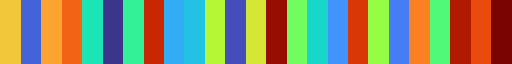

In [24]:
cmap

In [25]:
# subset transcripts for fast plotting
sdata[f'{sample_name}_all_transcript_factors_sub'] = sdata[f'{sample_name}_all_transcript_factors'].sample(frac=0.0001)
#sdata['slide2_region1_transcripts_sub'] = sdata['slide2_region1_transcripts'].sample(frac=0.0001)

In [26]:
sdata[f'{sample_name}_polygons_sub'] = sdata[f'{sample_name}_polygons'].sample(frac=0.0001)
#sdata['slide2_region1_polygons_sub'] = sdata['slide2_region1_polygons'].sample(frac=0.0001)

In [27]:
# define bounding box for spatial query for high res plotting
bb_xmin = 10000
bb_ymin = 34000
bb_w = 3000
bb_h = 2000
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h

INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `foxf2_s2_r1_all_transcript_factors_sub` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


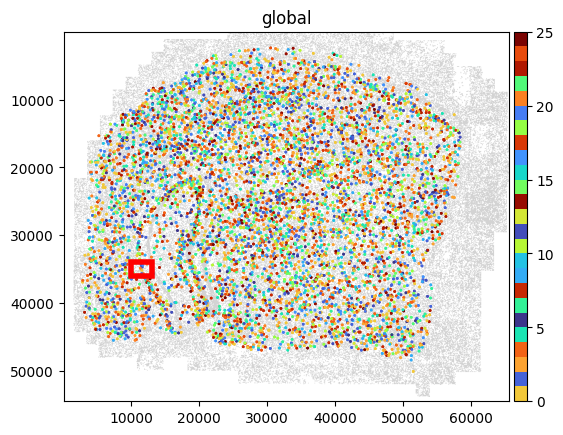

In [33]:
# plot cell segmentations and transcripts on whole slide
f, ax = plt.subplots()
sdata.pl.render_shapes(
    f'{sample_name}_polygons',
    #outline = True, method = "matplotlib"
).pl.render_points(
    f'{sample_name}_all_transcript_factors_sub', 
    color=f'{factor}_factors', cmap=cmap,
    method = "matplotlib"
).pl.show(ax=ax)
# ROI border
rect = patches.Rectangle((bb_xmin, bb_ymin), bb_w, bb_h, linewidth=4, edgecolor="red", facecolor="none")
ax.add_patch(rect)

In [34]:
# spatial crop of sdata to enable high-res plotting
cropped_sdata = sdata.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[bb_xmin, bb_ymin],
    max_coordinate=[bb_xmax, bb_ymax],
    target_coordinate_system="global",
)
cropped_sdata

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/functools.py:909: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)


SpatialData object
├── Images
│     └── 'foxf2_s2_r1_z3': DataTree[cyx] (7, 2000, 3000), (7, 1000, 1500), (7, 500, 750), (7, 250, 375), (7, 125, 187)
├── Points
│     ├── 'foxf2_s2_r1_all_transcript_factors': DataFrame with shape: (<Delayed>, 13) (2D points)
│     ├── 'foxf2_s2_r1_all_transcript_factors_sub': DataFrame with shape: (<Delayed>, 13) (2D points)
│     └── 'foxf2_s2_r1_transcripts': DataFrame with shape: (<Delayed>, 9) (2D points)
├── Shapes
│     └── 'foxf2_s2_r1_polygons': GeoDataFrame shape: (229, 9) (2D shapes)
└── Tables
      └── 'table': AnnData (229, 500)
with coordinate systems:
    ▸ 'global', with elements:
        foxf2_s2_r1_z3 (Images), foxf2_s2_r1_all_transcript_factors (Points), foxf2_s2_r1_all_transcript_factors_sub (Points), foxf2_s2_r1_transcripts (Points), foxf2_s2_r1_polygons (Shapes)

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `foxf2_s2_r1_all_transcript_factors` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


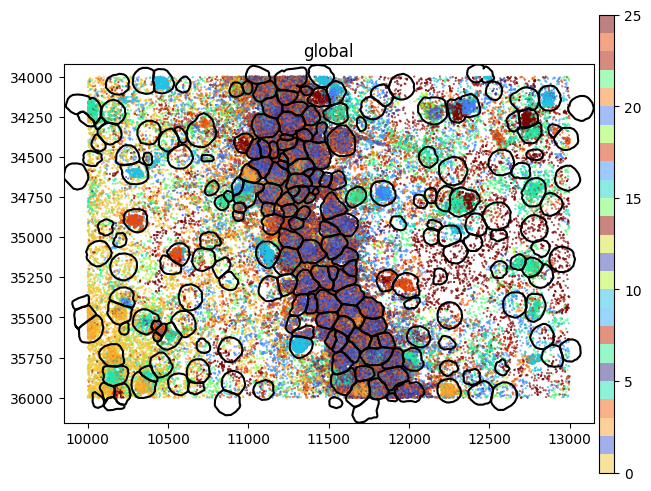

In [42]:
cropped_sdata.pl.render_points(
    f'{sample_name}_all_transcript_factors', 
    color=f'{factor}_factors', 
    cmap=cmap, method='matplotlib',
    alpha=0.5, size=0.2
).pl.render_shapes(
    f'{sample_name}_polygons', outline_alpha=1, 
    outline_color='black', fill_alpha=0
).pl.show()

In [ ]:
cropped_sdata.pl.render_images(f'{sample_name}_z3', channel=channels[6], scale='scale4', cmap="binary").pl.show()

In [23]:
from napari_spatialdata import Interactive

In [24]:
interactive = Interactive(sdata)
interactive.run()

In [25]:
sdata

SpatialData object, with associated Zarr store: /Users/hannah.spitzer/projects/cellseg_benchmark/st-bsb/data/processed_data/FOXF2/SLIDE2/REGION1/sdata.zarr
├── Images
│     └── 'slide2_region1_z3': DataTree[cyx] (7, 54456, 65675), (7, 27228, 32837), (7, 13614, 16418), (7, 6807, 8209), (7, 3403, 4104)
├── Points
│     ├── 'slide2_region1_nF25_d6_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     └── 'slide2_region1_transcripts': DataFrame with shape: (<Delayed>, 10) (2D points)
├── Shapes
│     └── 'slide2_region1_polygons': GeoDataFrame shape: (107013, 9) (2D shapes)
└── Tables
      └── 'table': AnnData (107013, 500)
with coordinate systems:
    ▸ 'global', with elements:
        slide2_region1_z3 (Images), slide2_region1_nF25_d6_pixel_factors (Points), slide2_region1_transcripts (Points), slide2_region1_polygons (Shapes)
with the following elements not in the Zarr store:
    ▸ slide2_region1_z3 (Images)

2025-01-14 11:56:32.623 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-01-14 11:56:32.894 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-01-14 12:00:09.625 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-01-14 12:00:09.648 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2025-01-14 12:00:09.652 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.


: 

In [10]:
merfish_sdata = spatialdata.read_zarr('/Users/hannah.spitzer/Downloads/data.zarr')

In [73]:
merfish_sdata.points["single_molecule"] = merfish_sdata.points["single_molecule"].sample(frac=0.01)

/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/spatialdata/_core/_elements.py:106: UserWarning: Key `single_molecule` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/spatialdata/_core/_elements.py:106: UserWarning: Key `single_molecule` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/spatialdata_plot/pl/utils.py:781: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired valu

INFO     Using 'datashader' backend with 'sum' as reduction method to speed up plotting. Depending on the reduction
         method, the value range of the plot might change. Set method to 'matplotlib' do disable this behaviour.   


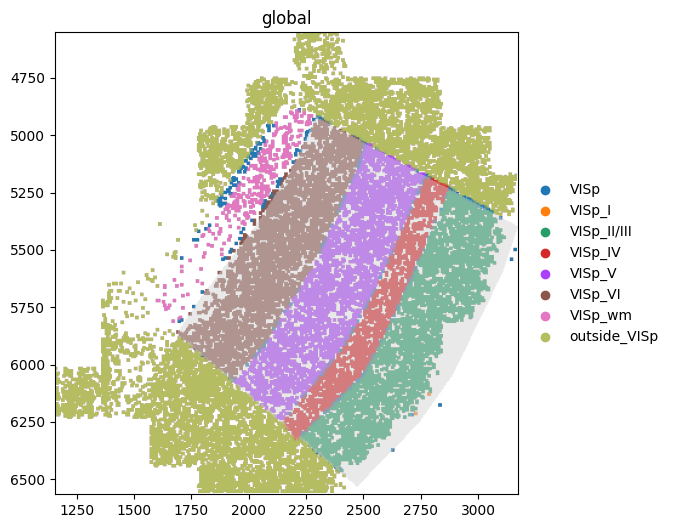

In [100]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 6))

(
    merfish_sdata.subset(["anatomical", "rasterized", "single_molecule"])
    .pl.render_points(color="cell_type", size=1, method='datashader')
    .pl.render_shapes(fill_alpha=0.5, outline=True, method='datashader')
    .pl.show(ax=ax)
)

/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/spatialdata/_core/_elements.py:106: UserWarning: Key `single_molecule` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/spatialdata_plot/pl/utils.py:781: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired valu

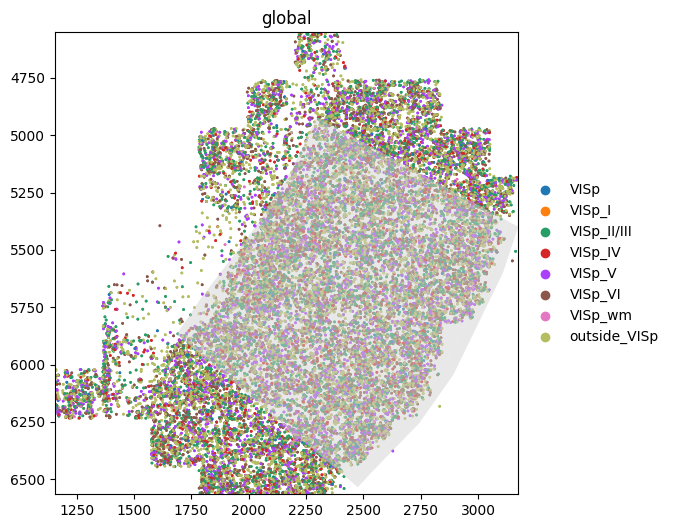

In [99]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 6))

(
    merfish_sdata.subset(["anatomical", "rasterized", "single_molecule"])
    .pl.render_points(color="cell_type", size=1, method='matplotlib')
    .pl.render_shapes(fill_alpha=0.5, outline=True, method='matplotlib')
    .pl.show(ax=ax)
)

In [13]:
merfish_sdata['single_molecule']

,x,y,cell_type
npartitions=1,,,
,float64,float64,category[unknown]
,...,...,...


In [16]:
merfish_sdata['table'].uns['spatialdata_attrs']

{'instance_key': 'cell_id', 'region': 'cells', 'region_key': 'region'}

In [78]:
blobs_sdata = spatialdata.datasets.blobs()

/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/spatialdata/models/models.py:1048: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


In [79]:
blobs_sdata

SpatialData object
├── Images
│     ├── 'blobs_image': DataArray[cyx] (3, 512, 512)
│     └── 'blobs_multiscale_image': DataTree[cyx] (3, 512, 512), (3, 256, 256), (3, 128, 128)
├── Labels
│     ├── 'blobs_labels': DataArray[yx] (512, 512)
│     └── 'blobs_multiscale_labels': DataTree[yx] (512, 512), (256, 256), (128, 128)
├── Points
│     └── 'blobs_points': DataFrame with shape: (<Delayed>, 4) (2D points)
├── Shapes
│     ├── 'blobs_circles': GeoDataFrame shape: (5, 2) (2D shapes)
│     ├── 'blobs_multipolygons': GeoDataFrame shape: (2, 1) (2D shapes)
│     └── 'blobs_polygons': GeoDataFrame shape: (5, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (26, 3)
with coordinate systems:
    ▸ 'global', with elements:
        blobs_image (Images), blobs_multiscale_image (Images), blobs_labels (Labels), blobs_multiscale_labels (Labels), blobs_points (Points), blobs_circles (Shapes), blobs_multipolygons (Shapes), blobs_polygons (Shapes)

In [84]:
blobs_sdata['blobs_circles']

,geometry,radius
0,POINT (291.062 197.065),51
1,POINT (259.026 371.319),51
2,POINT (194.973 204.414),51
3,POINT (149.926 188.623),51
4,POINT (369.422 258.9),51


INFO     Using 'datashader' backend with 'sum' as reduction method to speed up plotting. Depending on the reduction
         method, the value range of the plot might change. Set method to 'matplotlib' do disable this behaviour.   


/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/spatialdata/_core/_elements.py:106: UserWarning: Key `blobs_points` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/spatialdata_plot/pl/utils.py:781: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value t

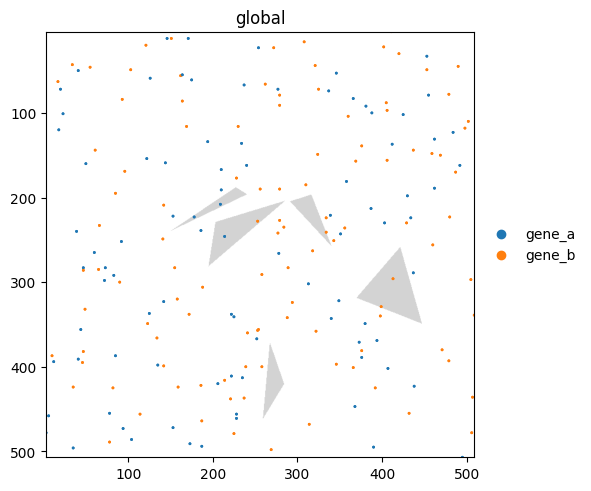

In [104]:
blobs_sdata.pl.render_shapes('blobs_polygons', method='datashader').pl.render_points(color='genes').pl.show()

/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/spatialdata/_core/_elements.py:106: UserWarning: Key `blobs_points` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/hannah.spitzer/miniconda3/envs/cellseg/lib/python3.10/site-packages/spatialdata_plot/pl/utils.py:781: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value t

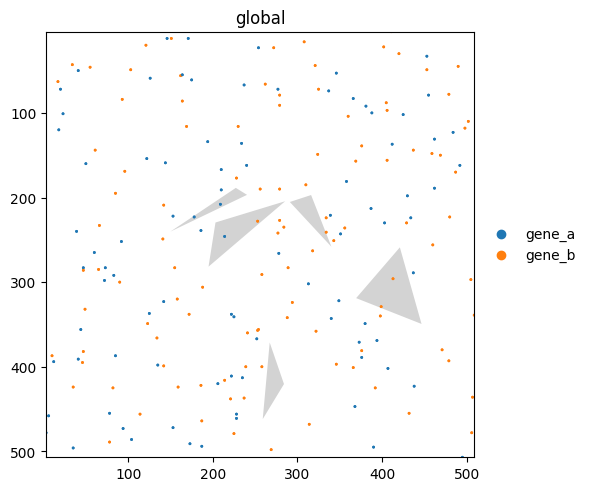

In [105]:
blobs_sdata.pl.render_shapes('blobs_polygons').pl.render_points(color='genes').pl.show()